# Crop Classification and Residual Analysis

In [1]:
import pandas as pd
import scipy as sc
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.cross_validation import cross_val_score
import warnings
warnings.filterwarnings('ignore')

/home/marcel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
Crops = pd.read_csv('Data/Agosto.csv').iloc[:,1:]

In [3]:
Crops['crop_list']
Active = Crops[Crops['is_active'] == 1]

In [4]:
lottacrop = Active[Active.crop_list.str.contains('OAT')|Active.crop_list.str.contains('SUNFLOWER')  | Active.crop_list.str.contains('ALMOND') | Active.crop_list.str.contains('GRAPE') | Active.crop_list.str.contains('WALNUT') |Active.crop_list.str.contains('RICE') | Active.crop_list.str.contains('ALFALFA')| Active.crop_list.str.contains('ALFALFA') | Active.crop_list.str.contains('CORN')| Active.crop_list.str.contains('WHEAT')| Active.crop_list.str.contains('TOMATO')  | Active.crop_list.str.contains('SAFFLOWER')]

In [5]:
nonorg = lottacrop.drop(lottacrop.crop_list[lottacrop.crop_list.str.contains('ORG')].index)

In [6]:
lottacrop.crop_list[lottacrop['crop_list'].str.contains('ALMOND')] = 'ALMOND'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('GRAPE')] = 'GRAPE'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('OAT')] = 'OAT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('RICE')] = 'RICE'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('SUNFLOWER')] = 'SUNFLOWER'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('WALNUT')] = 'WALNUT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('ALFALFA')] = 'ALFALFA'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('CORN')] = 'CORN'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('WHEAT')] = 'WHEAT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('TOMATO')] = 'TOMATO'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('SAFFLOWER')] = 'SAFFLOWER'

In [7]:
lottacrop['code'] = lottacrop.crop_list.astype('category').cat.codes

In [8]:
crops_list = {"WALNUT":9,"ALFALFA":0,"OAT":4,"GRAPE":3,"ALMOND":1,"WHEAT":10,"RICE":5,"CORN":2,"SAFFLOWER":6, "SUNFLOWER":7, "TOMATO":8}

In [9]:
firstx = lottacrop.iloc[:,1:61].dropna()
secondx = lottacrop.iloc[:,85:-1].dropna()

# Model Selection Process with only July Crops
### All Crops

In [10]:
fullx = firstx.dropna()
fully = lottacrop.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [11]:
n_neighbors = 25

RFC = RandomForestClassifier()
extra = ExtraTreesClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')

knn.fit(X_train, Y_train)
extra.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
svm = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [12]:
print(svm.score(X_test,Y_test))
print(knn.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.6085907335907336
0.837596525096525
0.8482142857142857
0.8467664092664092


In [13]:
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.73520134, 6.42755794, 5.49248397, 6.07179904, 5.51035817,
       5.86583516, 5.5857843 , 6.54643192, 6.86974421, 5.9654336 ,
       6.54452162])

In [14]:
confusion_matrix(Y_test,extra.predict(X_test))

array([[559,   5,   1,  22,   4,   0,   3,   3,  17,   2,   6],
       [ 14, 379,   3,  10,  11,   1,   0,   5,   2,   5,   9],
       [  1,   6, 114,   0,   4,   0,   1,   4,   5,   1,   4],
       [ 12,  18,   2, 206,   0,   1,   1,   1,   5,   4,   2],
       [  6,   9,   4,   1, 108,   0,   1,   2,   0,   3,  21],
       [  2,   0,   1,   0,   3, 293,   2,   2,   4,   1,   1],
       [  7,   1,   2,   5,   3,   3, 127,   3,   4,   0,   6],
       [ 19,   8,  10,   2,   2,   4,   8, 397,  61,   0,   9],
       [ 16,   0,   7,   2,   0,   3,   2,  33, 671,   0,  17],
       [ 17,  24,   2,  10,   2,   1,   0,   2,   3, 174,   5],
       [ 18,  13,   1,   1,  16,   0,   4,   3,   8,   4, 487]])

In [15]:
confusion_matrix(Y_test,RFC.predict(X_test))

array([[567,  10,   0,   8,   3,   0,   3,   2,  12,   5,  12],
       [ 12, 363,   5,  16,  12,   0,   2,   5,   4,  10,  10],
       [  0,   5, 111,   0,   2,   0,   2,   5,   8,   3,   4],
       [ 18,  18,   2, 197,   0,   0,   2,   0,  10,   3,   2],
       [  3,  10,   2,   2, 108,   0,   1,   2,   3,   4,  20],
       [  2,   1,   4,   0,   1, 292,   2,   0,   1,   3,   3],
       [  2,   1,   3,   0,   4,   3, 130,   2,   8,   0,   8],
       [ 17,   8,   8,   1,   0,   7,  10, 405,  54,   2,   8],
       [  9,   8,   6,   5,   0,   2,   0,  35, 669,   3,  14],
       [ 24,  28,   1,   6,   3,   2,   0,   0,   4, 169,   3],
       [ 16,   7,   3,   2,  10,   0,   4,   4,  11,   0, 498]])

### Non-Organic

In [16]:
firstx = nonorg.iloc[:,1:61].dropna()
fullx = firstx.dropna()
fully = lottacrop.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [17]:
n_neighbors = 25

RFC = RandomForestClassifier()
extra = ExtraTreesClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')

knn.fit(X_train, Y_train)
extra.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
svm = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [18]:
print(svm.score(X_test,Y_test))
print(knn.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.6065
0.836
0.85775
0.85025


In [19]:
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.69628476, 6.45978468, 5.41372086, 6.05117122, 5.48351452,
       5.87091406, 5.40445737, 6.46839765, 6.74193028, 5.84976225,
       6.46122045])

In [20]:
confusion_matrix(Y_test,extra.predict(X_test))

array([[552,   9,   3,   6,   0,   0,   3,   6,   7,   4,  10],
       [ 15, 389,   4,  12,  10,   1,   0,   2,   1,   7,   4],
       [  4,   3, 104,   1,   1,   1,   0,  10,  10,   2,   2],
       [ 26,  20,   5, 219,   0,   0,   0,   2,   9,   1,   9],
       [  4,  11,   1,   1, 103,   4,   1,   0,   3,   0,   9],
       [  1,   3,   2,   0,   0, 292,   5,   2,   2,   1,   0],
       [  8,   1,   6,   7,   1,   0, 115,   6,   7,   0,  10],
       [ 14,   6,   5,   0,   2,   6,   2, 403,  28,   4,   2],
       [ 11,   5,  11,   0,   0,   3,   1,  28, 608,   0,   4],
       [ 14,  23,   2,  13,   7,   4,   0,   1,   2, 172,   5],
       [  5,  18,   2,   4,  11,   1,   2,   7,   9,   1, 474]])

In [21]:
confusion_matrix(Y_test,RFC.predict(X_test))

array([[556,   6,   3,   7,   1,   0,   3,   4,   7,   0,  13],
       [ 13, 370,   1,  25,   7,   0,   0,   4,   1,  12,  12],
       [  2,   3, 103,   1,   3,   1,   1,  11,   4,   3,   6],
       [ 25,  15,   7, 218,   4,   1,   1,   2,  11,   2,   5],
       [  6,   6,   0,   1, 100,   4,   0,   2,   3,   2,  13],
       [  2,   1,   6,   0,   0, 288,   7,   2,   0,   1,   1],
       [  6,   4,   6,   3,   2,   1, 117,   9,   5,   0,   8],
       [ 16,   9,   5,   1,   0,   7,   2, 398,  29,   0,   5],
       [ 13,   4,  11,   0,   0,   2,   0,  34, 602,   0,   5],
       [ 16,  24,   1,  10,   5,   4,   2,   3,   1, 170,   7],
       [  5,  14,   0,   3,  13,   1,   3,   7,   9,   0, 479]])

# Model Selection Process with all Crops (July and August)

In [22]:
fullx = firstx.join(secondx).dropna()
fully = lottacrop.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

# Cross Validation for KNN

In [29]:
myList = list(range(1,50))

# subsetting just the odd ones
neighbors2 = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []


# perform 10-fold cross validation
for k in neighbors2:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',algorithm='ball_tree')
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
#print(cv_scores) # print if you want


In [31]:
n_neighbors = 9

RFC = RandomForestClassifier()
extra = ExtraTreesClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')

knn.fit(X_train, Y_train)
extra.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
svm = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [32]:
print(svm.score(X_test,Y_test))
print(knn.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.646
0.87025
0.88425
0.87525


In [33]:
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.60726776, 6.39703847, 5.3945743 , 5.95447896, 5.15565798,
       5.79076444, 5.40276897, 6.50169177, 6.73709353, 5.80264365,
       6.4769764 ])

In [34]:
confusion_matrix(Y_test,extra.predict(X_test))

array([[573,   6,   0,   3,   3,   0,   1,   0,   5,   0,   3],
       [ 11, 395,   0,  10,   3,   0,   0,   2,   0,   3,   4],
       [  1,   1, 104,   3,   0,   1,   6,   6,  10,   0,   6],
       [  9,  20,   2, 220,   0,   0,   1,   3,   1,   9,   1],
       [  7,   7,   3,   0,  91,   2,   1,   2,   3,   3,  12],
       [  3,   1,   0,   1,   0, 284,   1,   3,   0,   0,   0],
       [  2,   6,   5,   4,   0,   7, 132,   7,   4,   0,   6],
       [  5,   6,   3,   6,   2,   4,   5, 445,  38,   0,   3],
       [ 10,   2,   7,   1,   0,   0,   0,  42, 620,   0,   6],
       [  6,  22,   0,   9,   2,   2,   0,   2,   1, 170,  10],
       [  6,   6,   0,   2,   3,   1,   9,   5,  12,   1, 503]])

In [35]:
confusion_matrix(Y_test,RFC.predict(X_test))

array([[566,   5,   0,   3,   0,   0,   2,   1,   8,   0,   9],
       [  5, 379,   0,  15,   4,   0,   0,   3,   0,  12,  10],
       [  2,   1, 101,   2,   0,   1,   8,   6,  15,   0,   2],
       [ 14,  30,   1, 213,   0,   0,   1,   0,   1,   5,   1],
       [  4,   7,   1,   3,  93,   2,   2,   2,   4,   0,  13],
       [  0,   0,   0,   2,   1, 285,   1,   3,   0,   0,   1],
       [  3,   7,   4,   3,   1,   6, 128,   6,   7,   0,   8],
       [  7,   3,   2,   6,   1,   4,   6, 444,  39,   0,   5],
       [  7,   3,   8,   2,   0,   1,   0,  36, 625,   0,   6],
       [ 10,  26,   0,   8,   3,   2,   0,   4,   2, 166,   3],
       [  6,  14,   0,   2,   3,   1,   6,   5,  10,   0, 501]])

# Using Non-Organic Data

In [36]:
nonorg.crop_list[nonorg['crop_list'].str.contains('ALMOND')] = 'ALMOND'
nonorg.crop_list[nonorg['crop_list'].str.contains('GRAPE')] = 'GRAPE'
nonorg.crop_list[nonorg['crop_list'].str.contains('OAT')] = 'OAT'
nonorg.crop_list[nonorg['crop_list'].str.contains('RICE')] = 'RICE'
nonorg.crop_list[nonorg['crop_list'].str.contains('SUNFLOWER')] = 'SUNFLOWER'
nonorg.crop_list[nonorg['crop_list'].str.contains('WALNUT')] = 'WALNUT'
nonorg.crop_list[nonorg['crop_list'].str.contains('ALFALFA')] = 'ALFALFA'
nonorg.crop_list[nonorg['crop_list'].str.contains('CORN')] = 'CORN'
nonorg.crop_list[nonorg['crop_list'].str.contains('WHEAT')] = 'WHEAT'
nonorg.crop_list[nonorg['crop_list'].str.contains('TOMATO')] = 'TOMATO'
nonorg.crop_list[nonorg['crop_list'].str.contains('SAFFLOWER')] = 'SAFFLOWER'

In [37]:
nonorg['code'] = nonorg.crop_list.astype('category').cat.codes

In [38]:
firstx = nonorg.iloc[:,1:61].dropna()
secondx = nonorg.iloc[:,85:-1].dropna()

In [39]:
fullx = firstx.join(secondx).dropna()
fully = nonorg.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [40]:
n_neighbors = 25

RFC = RandomForestClassifier()
extra = ExtraTreesClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')

knn.fit(X_train, Y_train)
extra.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
svm = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [41]:
print(svm.score(X_test,Y_test))
print(knn.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))

0.654
0.864
0.881
0.882


In [42]:
entropy=sc.stats.entropy(extra.predict_proba(X_test))
entropy

array([6.62911944, 6.39194369, 5.33664654, 5.92564079, 5.42224586,
       5.82251718, 5.44078787, 6.42489761, 6.76764379, 5.80115351,
       6.45293097])

In [43]:
confusion_matrix(Y_test,extra.predict(X_test))

array([[592,   1,   0,   4,   4,   0,   1,   1,   4,   2,   2],
       [  1, 390,   0,   8,   9,   0,   0,   0,   0,   9,  15],
       [  4,   2, 123,   3,   1,   0,   3,  14,   5,   0,   2],
       [  7,  33,   0, 203,   6,   0,   1,   2,   0,   5,   5],
       [  7,   9,   0,   1, 103,   4,   1,   0,   0,   0,  17],
       [  0,   1,   2,   0,   3, 295,   4,   1,   1,   1,   2],
       [  6,   0,   4,   1,   1,   1, 127,   4,   5,   1,   7],
       [  5,   3,   6,   5,   3,  11,   5, 406,  40,   0,   4],
       [  8,   3,   4,   1,   0,   0,   0,  31, 641,   0,   5],
       [  5,  22,   2,  12,   1,   0,   0,   3,   0, 171,   2],
       [  8,   8,   1,   1,  14,   0,   9,   4,  11,   1, 473]])

In [44]:
confusion_matrix(Y_test,RFC.predict(X_test))

array([[590,   5,   0,   3,   3,   0,   2,   3,   3,   0,   2],
       [  3, 391,   2,   9,   9,   1,   0,   0,   0,   3,  14],
       [  7,   3, 114,   1,   2,   2,   4,  12,   6,   1,   5],
       [ 15,  18,   0, 205,   2,   1,   0,   4,   2,   5,  10],
       [  6,   3,   5,   1, 106,   4,   1,   0,   0,   0,  16],
       [  2,   1,   0,   0,   1, 295,   4,   1,   1,   2,   3],
       [  4,   1,   3,   5,   2,   1, 122,   6,   6,   0,   7],
       [ 11,   1,   4,   0,   4,   8,   6, 413,  36,   0,   5],
       [  8,   3,   4,   0,   0,   0,   1,  30, 635,   0,  12],
       [  9,  18,   0,   8,   1,   0,   1,   2,   0, 177,   2],
       [ 11,   7,   1,   2,   4,   0,   8,   6,  10,   1, 480]])

## Residual Analysis
#### Entropy Analysis for Extra Trees Classifier

In [45]:
misclassified = np.where(Y_test != extra.predict(X_test))
classified = np.where(Y_test == extra.predict(X_test))

In [46]:
def logfcn(x):
    c = x.copy()
    c[np.where(c == 0.0)] = 1 
    return np.log(c)

In [47]:
pk = extra.predict_proba(X_test)
d = pk * logfcn(pk)
entropy = -1*np.sum(d, axis = 1)

In [48]:
import geopandas as gpd

In [49]:
cropfields = gpd.read_file("Crops_2016/Crops_2016_26910.shp")
cropfields1 = cropfields[["OBJECTID", "geometry"]]

In [50]:
test_df = lottacrop.loc[X_test.index]
test_df['entropy'] = entropy
testfields = gpd.GeoDataFrame(test_df.merge(cropfields1, on = 'OBJECTID', how = 'left'))

In [51]:
testfields["geometry"] = testfields["geometry_y"]
testfields = testfields.drop(columns = ["geometry_y"])
testfields.crs = {'init': 'epsg:26910'}
testfields = testfields.to_crs("+proj=longlat +datum=WGS84 +no_defs")

In [52]:
counties = gpd.read_file("cb_2016_us_county_500k/cb_2016_us_county_500k.shp")
cali = counties[counties.STATEFP == "06"]
keep = ["Yolo", "Lake", "Colusa", "Sutter", "Sacramento", "Solano", "Napa"]
yolo = cali[cali.NAME.isin(keep)]

Text(20.75,0.5,'Longitude')

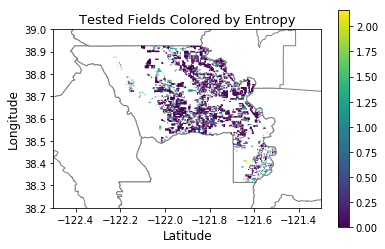

In [67]:
ax = yolo.plot(color = "white", edgecolor = "gray")
testfields.plot(ax =ax, column = 'entropy', legend = True)
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Tested Fields Colored by Entropy", fontsize = 13)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [54]:
misclass_test = testfields.loc[misclassified]

In [55]:
len(nonorg)

10005

Text(44.3617,0.5,'Longitude')

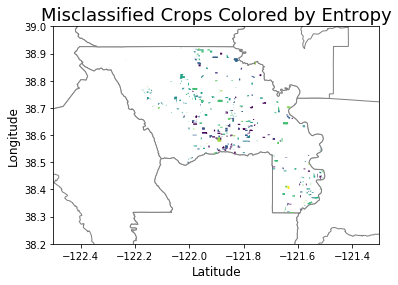

In [56]:
ax = yolo.plot(color = "white", edgecolor = "gray")
misclass_test.plot(ax =ax, column = 'entropy', legend = True)
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Misclassified Crops Colored by Entropy", fontsize = 18)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [57]:
class_test = testfields.loc[classified]

Text(20.75,0.5,'Longitude')

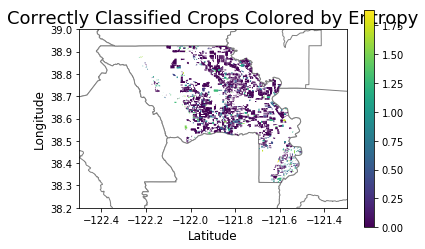

In [64]:
ax = yolo.plot(color = "white", edgecolor = "gray")
class_test.plot(ax =ax, column = 'entropy', legend = True)
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Correctly Classified Crops Colored by Entropy", fontsize = 18)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [59]:
np.mean(misclass_test["entropy"])

0.9194652992316215

In [60]:
np.std(misclass_test["entropy"])

0.577529242426035

In [61]:
np.mean(class_test["entropy"])

0.1626121229460816

In [62]:
np.std(class_test["entropy"])

0.37095405841153517